# **Project Name** - Visualisation of Bitcoin's impact on a basic Portfolio 
##### **Project Type** - Visualisation and Strategy/Recommendation
##### **Contribution** - Individual
##### **Member Name -** Eileen Ip
# **Project Summary -**  

Bitcoin is another one of the cryptocurrency investment. Through 2013-2017, Bitcoin has reached unbelievable heights. It will be interesting to explore what all other insights can be obtained from comparing to S&P 500, gold prices and US Consumer Price Index.

# **GitHub Link -**
https://github.com/EileenIp/Visualisation-of-Bitcoin-s-impact-on-a-basic-Portfolio

# **Problem Statement -**
This dataset consists of information of bitcoin, S&P 500, gold from Yahoo Finance database, and also information of US consumer price index from FEUD. 

### As an investment firm we are facing the question whether an allocation to Bitcoin could improve our fund's performance?

To help answer this question, this report will analyze Bitcoin's performance since 2014, alongside the two other major asset classes in our fund, US equities and gold. In doing so we will answer several questions:

- How does the performance of Bitcoin (i.e. risk and returns) compare to the S&P 500 and the price of gold?
- How does the inclusion of Bitcoin change a portfolio's characteristics and can it help improve a portfolio's performance?
- Could Bitcoin be used as a hedge against inflation? (as claimed by crypto bros)

In the light of our fund's goal to minimize risk: What is the minimum volatility portfolio, consisting of these three asset classes? And for comparison: Which portfolio would maximize risk-adjusted returns?

**In this project, required to do:**

*   Exploratory Data Analysis.
*   Bitcoin and Inflation Analysis
*   Porfolio Allocation and Analysis
*   Portfolio Optimisation

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing Library necessary for the project
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import plt, mpl
plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['figure.figsize'] = [14, 6]
np.set_printoptions(formatter={'float': lambda x: f'{x:5.2f}'})
import yfinance as yf

#Import scipy for linear regressions
from scipy import stats
from pypfopt import EfficientFrontier
import cvxpy as cp

import warnings
warnings.filterwarnings("ignore")

### Data Collection Loading

In [ ]:
start="2015-09-01"
end="2024-09-01"
spy_df = yf.download('^GSPC',start, end, auto_adjust=False, actions=False, multi_level_index = False)
btc_df = yf.download('BTC-USD',start, end, auto_adjust=False, actions=False, multi_level_index = False)
gld_df = yf.download('GC=F',start, end, auto_adjust=False, actions=False, multi_level_index = False)
cpi_df = pd.read_csv("C:/Users/eilee/OneDrive/Documents/2024projects/cyptocurrency analysis/CPIAUCSL.csv")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Dataset First View

In [ ]:
spy_df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2015-09-01,1913.849976,1913.849976,1970.089966,1903.069946,1970.089966,4371850000
2015-09-02,1948.859985,1948.859985,1948.910034,1916.520020,1916.520020,3742620000
2015-09-03,1951.130005,1951.130005,1975.010010,1944.719971,1950.790039,3520700000
2015-09-04,1921.219971,1921.219971,1947.760010,1911.209961,1947.760010,3167090000
2015-09-08,1969.410034,1969.410034,1970.420044,1927.300049,1927.300049,3548650000


In [ ]:
btc_df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2015-09-01,228.121002,228.121002,231.216003,226.860001,230.255997,20575200
2015-09-02,229.283997,229.283997,230.576996,226.475006,228.026993,18760400
2015-09-03,227.182999,227.182999,229.604996,226.667007,229.324005,17482000
2015-09-04,230.298004,230.298004,230.899994,227.050995,227.214996,20962400
2015-09-05,235.018997,235.018997,236.143005,229.442993,230.199005,20671400


In [ ]:
gld_df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2015-09-01,1138.699951,1138.699951,1144.699951,1133.500000,1133.500000,375
2015-09-02,1132.500000,1132.500000,1140.400024,1130.800049,1137.300049,201
2015-09-03,1123.699951,1123.699951,1132.900024,1120.300049,1130.300049,122
2015-09-04,1120.599976,1120.599976,1125.199951,1116.199951,1123.400024,51
2015-09-08,1120.400024,1120.400024,1124.300049,1116.400024,1119.800049,138


In [ ]:
cpi_df.head()

,observation_date,CPIAUCSL
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


## ***2. Data Wrangling***

### Data Wrangling Code

In [ ]:
# we can see that the we have one extra day of data compared to BTC data so let's drop that extra day
spy_df = spy_df[1:]
gld_df = gld_df[1:]

In [ ]:
#lets set the index to date for CPI data and rename the date column
cpi_df.rename(columns={'observation_date':'Date'}, inplace=True)
cpi_df['Date'] = pd.to_datetime(cpi_df['Date'])
cpi_df.head()

,Date,CPIAUCSL
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [ ]:
cpi_df.set_index('Date',inplace=True)
cpi_df

,CPIAUCSL
Date,
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2024-09-01,314.851
2024-10-01,315.564
2024-11-01,316.449


In [ ]:
# Lets merge equity data and gold data together
merged_df1 = spy_df.merge(btc_df,on='Date',how='left').merge(gld_df,on='Date',how='left')
merged_df1.head()

,Adj Close_x,Close_x,High_x,Low_x,Open_x,Volume_x,Adj Close_y,Close_y,High_y,Low_y,Open_y,Volume_y,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,,,,,,,,,,,,
2015-09-02,1948.859985,1948.859985,1948.910034,1916.520020,1916.520020,3742620000,229.283997,229.283997,230.576996,226.475006,228.026993,18760400,1132.500000,1132.500000,1140.400024,1130.800049,1137.300049,201.0
2015-09-03,1951.130005,1951.130005,1975.010010,1944.719971,1950.790039,3520700000,227.182999,227.182999,229.604996,226.667007,229.324005,17482000,1123.699951,1123.699951,1132.900024,1120.300049,1130.300049,122.0
2015-09-04,1921.219971,1921.219971,1947.760010,1911.209961,1947.760010,3167090000,230.298004,230.298004,230.899994,227.050995,227.214996,20962400,1120.599976,1120.599976,1125.199951,1116.199951,1123.400024,51.0
2015-09-08,1969.410034,1969.410034,1970.420044,1927.300049,1927.300049,3548650000,243.606995,243.606995,245.781006,239.677994,239.845993,26879200,1120.400024,1120.400024,1124.300049,1116.400024,1119.800049,138.0
2015-09-09,1942.040039,1942.040039,1988.630005,1937.880005,1971.449951,3652120000,238.167999,238.167999,244.416000,237.820999,243.414993,23635700,1102.199951,1102.199951,1123.500000,1102.099976,1123.500000,150.0


In [ ]:
#lets resample the daily frequency to monthly frequency data
mnth_df = merged_df1.resample('MS').last()
mnth_df = mnth_df[:98]    #drop the last row 
mnth_df.head()

,Adj Close_x,Close_x,High_x,Low_x,Open_x,Volume_x,Adj Close_y,Close_y,High_y,Low_y,Open_y,Volume_y,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,,,,,,,,,,,,
2015-09-01,1920.030029,1920.030029,1920.530029,1887.140015,1887.140015,4525070000,236.059998,236.059998,237.733994,235.628998,236.639999,19743500,1115.500000,1115.500000,1126.000000,1112.099976,1124.300049,865.0
2015-10-01,2079.360107,2079.360107,2094.320068,2079.340088,2090.000000,4256200000,328.015015,328.015015,334.169006,313.940002,313.942993,78305000,1141.500000,1141.500000,1147.599976,1139.199951,1147.500000,249.0
2015-11-01,2080.409912,2080.409912,2093.810059,2080.409912,2090.949951,4275030000,377.321014,377.321014,382.363007,370.382996,371.437012,71701600,1065.800049,1065.800049,1068.400024,1052.099976,1056.500000,4601.0
2015-12-01,2043.939941,2043.939941,2062.540039,2043.619995,2060.590088,2655330000,430.566986,430.566986,432.920990,418.734985,425.875000,45996600,1060.300049,1060.300049,1062.000000,1058.500000,1061.900024,10.0
2016-01-01,1940.239990,1940.239990,1940.239990,1894.000000,1894.000000,5497570000,379.473999,379.473999,384.378998,365.451996,380.108002,86125296,1116.400024,1116.400024,1118.599976,1108.800049,1114.400024,6955.0


In [ ]:
#lets merge the cpi data with the above merged dataframe
final_df = mnth_df.merge(cpi_df,on='Date')
final_df.head()

,Adj Close_x,Close_x,High_x,Low_x,Open_x,Volume_x,Adj Close_y,Close_y,High_y,Low_y,Open_y,Volume_y,Adj Close,Close,High,Low,Open,Volume,CPIAUCSL
Date,,,,,,,,,,,,,,,,,,,
2015-09-01,1920.030029,1920.030029,1920.530029,1887.140015,1887.140015,4525070000,236.059998,236.059998,237.733994,235.628998,236.639999,19743500,1115.500000,1115.500000,1126.000000,1112.099976,1124.300049,865.0,237.498
2015-10-01,2079.360107,2079.360107,2094.320068,2079.340088,2090.000000,4256200000,328.015015,328.015015,334.169006,313.940002,313.942993,78305000,1141.500000,1141.500000,1147.599976,1139.199951,1147.500000,249.0,237.733
2015-11-01,2080.409912,2080.409912,2093.810059,2080.409912,2090.949951,4275030000,377.321014,377.321014,382.363007,370.382996,371.437012,71701600,1065.800049,1065.800049,1068.400024,1052.099976,1056.500000,4601.0,238.017
2015-12-01,2043.939941,2043.939941,2062.540039,2043.619995,2060.590088,2655330000,430.566986,430.566986,432.920990,418.734985,425.875000,45996600,1060.300049,1060.300049,1062.000000,1058.500000,1061.900024,10.0,237.761
2016-01-01,1940.239990,1940.239990,1940.239990,1894.000000,1894.000000,5497570000,379.473999,379.473999,384.378998,365.451996,380.108002,86125296,1116.400024,1116.400024,1118.599976,1108.800049,1114.400024,6955.0,237.652


In [ ]:
#Lets drop all the columns that are not  adjusted closing price
final_df.drop(['Open_x','High_x','Close_x','Volume_x','Open_y','High_y','Close_y','Volume_y','Open','High','Close','Volume'],axis=1,inplace=True)
final_df.drop(['Low_x','Low_y','Low'],axis=1,inplace=True)
final_df

,Adj Close_x,Adj Close_y,Adj Close,CPIAUCSL
Date,,,,
2015-09-01,1920.030029,236.059998,1115.500000,237.498
2015-10-01,2079.360107,328.015015,1141.500000,237.733
2015-11-01,2080.409912,377.321014,1065.800049,238.017
2015-12-01,2043.939941,430.566986,1060.300049,237.761
2016-01-01,1940.239990,379.473999,1116.400024,237.652
...,...,...,...,...
2023-06-01,4450.379883,30477.251953,1921.099976,304.099
2023-07-01,4588.959961,29230.111328,1970.500000,304.615
2023-08-01,4507.660156,25931.472656,1938.199951,306.138


In [ ]:
final_df.rename(columns={'Adj Close_x':'Adj Close_spy','Adj Close_y':'Adj Close_btc','Adj Close':'Adj Close_gld','CPIAUCSL':'CPI'},inplace=True)
final_df

,Adj Close_spy,Adj Close_btc,Adj Close_gld,CPI
Date,,,,
2015-09-01,1920.030029,236.059998,1115.500000,237.498
2015-10-01,2079.360107,328.015015,1141.500000,237.733
2015-11-01,2080.409912,377.321014,1065.800049,238.017
2015-12-01,2043.939941,430.566986,1060.300049,237.761
2016-01-01,1940.239990,379.473999,1116.400024,237.652
...,...,...,...,...
2023-06-01,4450.379883,30477.251953,1921.099976,304.099
2023-07-01,4588.959961,29230.111328,1970.500000,304.615
2023-08-01,4507.660156,25931.472656,1938.199951,306.138


### Data Manipulation Summary
To make the data analysis ready I have done the following:
1. Dropped the extra day in S&P 500 and gold dataset.
2. Rename 'Observation Data' to 'Date'.
3. Set US Consumer Price index to Date. 
4. Merge all the datasets in one dataset.
5. Dropped all columns except adjusted close.
6. Rename each adjusted close to responding name.

## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
#Calculate Standardised Returns 
final_df['spy_std_ret'] = final_df['Adj Close_spy']/final_df['Adj Close_spy'][0] *100
final_df['btc_std_ret'] = final_df['Adj Close_btc']/final_df['Adj Close_btc'][0] *100
final_df['gld_std_ret'] = final_df['Adj Close_gld']/final_df['Adj Close_gld'][0] *100
final_df['CPI_pct_change'] = final_df['CPI']/final_df['CPI'][0] *100
final_df

,Adj Close_spy,Adj Close_btc,Adj Close_gld,CPI,spy_std_ret,btc_std_ret,gld_std_ret,CPI_pct_change
Date,,,,,,,,
2015-09-01,1920.030029,236.059998,1115.500000,237.498,100.000000,100.000000,100.000000,100.000000
2015-10-01,2079.360107,328.015015,1141.500000,237.733,108.298312,138.954087,102.330793,100.098948
2015-11-01,2080.409912,377.321014,1065.800049,238.017,108.352988,159.841150,95.544603,100.218528
2015-12-01,2043.939941,430.566986,1060.300049,237.761,106.453540,182.397268,95.051551,100.110738
2016-01-01,1940.239990,379.473999,1116.400024,237.652,101.052586,160.753200,100.080683,100.064843
...,...,...,...,...,...,...,...,...
2023-06-01,4450.379883,30477.251953,1921.099976,304.099,231.786994,12910.807536,172.218734,128.042762
2023-07-01,4588.959961,29230.111328,1970.500000,304.615,239.004593,12382.492430,176.647243,128.260027
2023-08-01,4507.660156,25931.472656,1938.199951,306.138,234.770295,10985.119429,173.751676,128.901296


#### Chart - 1 : Return Indices

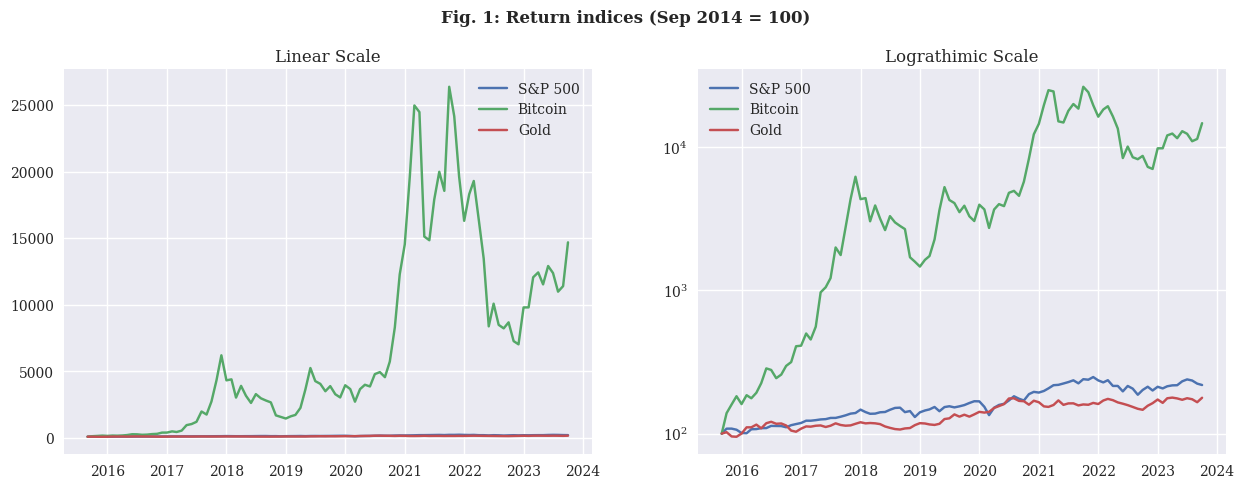

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plt.suptitle('Fig. 1: Return indices (Sep 2014 = 100)',fontweight='bold',y=1.0)
ax[0].plot(final_df['spy_std_ret'])
ax[0].plot(final_df['btc_std_ret'])
ax[0].plot(final_df['gld_std_ret'])
ax[0].set_title('Linear Scale')
ax[0].legend(['S&P 500','Bitcoin','Gold'])

ax[1].plot(final_df['spy_std_ret'])
ax[1].plot(final_df['btc_std_ret'])
ax[1].plot(final_df['gld_std_ret'])
plt.yscale('log')
ax[1].set_title('Lograthimic Scale')
ax[1].legend(['S&P 500','Bitcoin','Gold'])

In [ ]:
##Calculate period performance & annualized performance
spy_return = (final_df['Adj Close_spy'][-1]/final_df['Adj Close_spy'][0])-1
spy_return_ann = (spy_return + 1) ** (1 / (len(final_df) / 12)) - 1

btc_return = (final_df['Adj Close_btc'][-1]/final_df['Adj Close_btc'][0])-1
btc_return_ann = (btc_return + 1) ** (1 / (len(final_df) / 12)) - 1

gld_return = (final_df['Adj Close_gld'][-1]/final_df['Adj Close_gld'][0])-1
gld_return_ann = (gld_return + 1) ** (1 / (len(final_df) / 12)) - 1

print("SP500 ROI : ", spy_return, "SP500 annualized returns : ", spy_return_ann)
print("Bitcoin ROI : ", btc_return, "Bitcoin annualized returns : ", btc_return_ann)
print("Gold ROI : ", gld_return, "Gold annualized returns : ", gld_return_ann)

SP500 ROI :  1.1842365695828683 SP500 annualized returns :  0.10039066853954304
Bitcoin ROI :  145.86004239830987 Bitcoin annualized returns :  0.8421930551185595
Gold ROI :  0.779650337222658 Gold annualized returns :  0.07313219983127528


##### 1. Why did you pick the specific chart?
A line plot, also known as a line chart or line graph, is a way to visualize the trend of a single variable over time. It uses a series of data points connected by a line to show how the value of the variable changes over time.

Line plots are useful because they can quickly and easily show trends and patterns in the data. They are particularly useful for showing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

To see how the different prices are released over the years I have used line plot here.

##### 2. What is/are the insight(s) found from the chart?
We can see that in the time period between 2014 to 2022 bitcoin (62.6% p.a.) outperformed both the S&P500 (10.6% p.a.) and Gold (3.3% p.a.) significantly. 

##### 3. Will the gained insights help creating a positive business impact?

By identifying that Bitcoin significantly outperformed traditional assets like the S&P 500 and Gold from 2014 to 2022, businesses can make informed decisions about asset allocation and investment strategies. For instance, companies with a higher risk tolerance might consider diversifying their portfolios to include cryptocurrencies like Bitcoin, potentially yielding higher returns compared to traditional investments. Additionally, this insight can guide financial institutions in developing new products, such as crypto-based funds or investment vehicles, to attract investors seeking higher growth opportunities. Furthermore, businesses in the fintech sector can leverage this data to innovate and offer solutions that cater to the growing demand for cryptocurrency investments. Overall, understanding these trends enables businesses to align their strategies with market dynamics, capitalize on emerging opportunities, and enhance long-term profitability.

#### Chart - 2 : S&P 500 and Bitcoin Daily Trading Volume

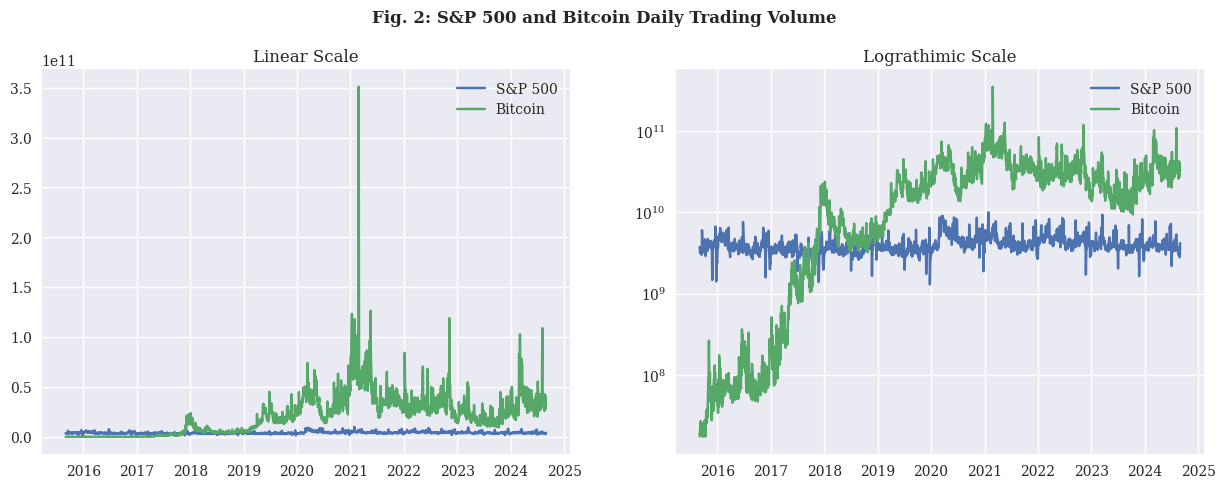

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plt.suptitle('Fig. 2: S&P 500 and Bitcoin Daily Trading Volume',fontweight='bold',y=1.0)
ax[0].plot(merged_df1['Volume_x'])
ax[0].plot(merged_df1['Volume_y'])
ax[0].set_title('Linear Scale')
ax[0].legend(['S&P 500','Bitcoin'])

ax[1].plot(merged_df1['Volume_x'])
ax[1].plot(merged_df1['Volume_y'])
plt.yscale('log')
ax[1].set_title('Lograthimic Scale')
ax[1].legend(['S&P 500','Bitcoin'])

##### 1. Why did you pick the specific chart?
A line plot, also known as a line chart or line graph, is a way to visualize the trend of a single variable over time. It uses a series of data points connected by a line to show how the value of the variable changes over time.

Line plots are useful because they can quickly and easily show trends and patterns in the data. They are particularly useful for showing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

To see how the different prices are released over the years I have used line plot here.

##### 2. What is/are the insight(s) found from the chart?
Figure 2 highlights the rising popularity of Bitcoin based on its trading volume. While trading volume of S&P 500 stocks has been relatively stable throughout the period, it has risen sharply for Bitcoin. Until late-2017 daily S&P 500 trading volumes exceeded Bitcoin's. Since then the trading volume in Bitcoin has been larger than S&P 500's, and by a wide margin.

##### 3. Will the gained insights help creating a positive business impact?
 The rising trading volume of Bitcoin compared to the S&P 500 indicates growing investor interest and market liquidity, making Bitcoin an increasingly attractive asset. Businesses in finance, fintech, or cryptocurrency sectors can leverage this trend by developing Bitcoin-related products, such as trading platforms, investment funds, or payment solutions, to capitalize on its popularity. Additionally, the data can guide marketing strategies, helping businesses target crypto-savvy investors and position themselves as leaders in the digital asset space. For traditional financial institutions, this insight may encourage the integration of cryptocurrency services to meet evolving customer demands. Overall, the trend highlights opportunities for innovation, revenue growth, and competitive advantage in a rapidly expanding market.

#### Chart - 3 : Comparing risk and returns of all the asset class in our universe:

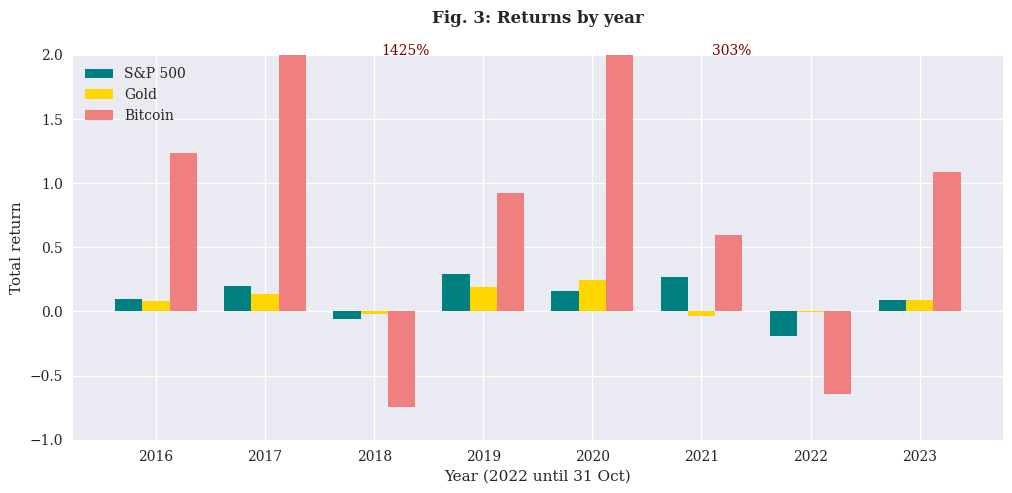

In [ ]:
# resample data to annual frequency

ann_df = final_df.resample('Y').last()
ann_df['spy_pct'] = ann_df['Adj Close_spy'].pct_change()
ann_df['btc_pct'] = ann_df['Adj Close_btc'].pct_change()
ann_df['gld_pct'] = ann_df['Adj Close_gld'].pct_change()
ann_df = ann_df[1:]

fig, ax = plt.subplots(figsize=(12,5))
plt.title('Fig. 3: Returns by year', pad=23, fontweight='bold')

years = ann_df.index.year
x_axis = np.arange(len(years))

ax.bar(x_axis, ann_df['spy_pct'], width=0.25, label = 'S&P 500', color='teal')
ax.bar(x_axis + 0.25, ann_df['gld_pct'], width=0.25, label = 'Gold', color='gold')
ax.bar(x_axis + 0.5, ann_df['btc_pct'], width=0.25, label = 'Bitcoin', color='lightcoral')

plt.xticks(x_axis + 0.25, years)
plt.ylim([-1,2])
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
#ax.grid(axis='y')
ax.legend(loc='upper left')
ax.set_ylabel('Total return')
ax.set_xlabel('Year (2022 until 31 Oct)')
ax.annotate('1425%', (2.32, 2), color='maroon')
ax.annotate('303%', (5.35, 2), color='maroon')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(left=False)

plt.show()

##### 1. Why did you pick the specific chart?
Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?
As can be seen in figure 3 Bitcoin outperformed in each single year except for 2018, and did so by a wide margin. Bitcoin's performance was particularly strong in 2017 (+1425%) and 2020 (+303%).

##### 3. Will the gained insights help creating a positive business impact?
Bitcoin's consistent outperformance, especially in 2017 and 2020, highlights its potential as a high-growth asset. Businesses in finance, investment, or cryptocurrency sectors can use this data to attract investors by promoting Bitcoin-related products or services, such as trading platforms, ETFs, or custody solutions. The strong performance also underscores the importance of including Bitcoin in diversified portfolios, which can enhance returns for asset management firms. Additionally, companies can leverage this insight to educate clients about cryptocurrency opportunities, building trust and credibility. For businesses in the crypto space, this data reinforces their value proposition, driving customer acquisition and retention. Overall, the chart highlights Bitcoin's growth potential, enabling businesses to innovate, expand offerings, and capitalize on emerging market trends.

#### Chart - 4 : Monthly Returns of different asset class

In [ ]:
#Visualizing Monthly Returns of different asset class
final_df['spy_pct']= final_df['Adj Close_spy'].pct_change()
final_df['btc_pct']=final_df['Adj Close_btc'].pct_change()
final_df['gld_pct']=final_df['Adj Close_gld'].pct_change()
final_df=final_df[1:]

final_df


,Adj Close_spy,Adj Close_btc,Adj Close_gld,CPI,spy_std_ret,btc_std_ret,gld_std_ret,CPI_pct_change,spy_pct,btc_pct,gld_pct
Date,,,,,,,,,,,
2015-10-01,2079.360107,328.015015,1141.500000,237.733,108.298312,138.954087,102.330793,100.098948,0.082983,0.389541,0.023308
2015-11-01,2080.409912,377.321014,1065.800049,238.017,108.352988,159.841150,95.544603,100.218528,0.000505,0.150316,-0.066316
2015-12-01,2043.939941,430.566986,1060.300049,237.761,106.453540,182.397268,95.051551,100.110738,-0.017530,0.141116,-0.005160
2016-01-01,1940.239990,379.473999,1116.400024,237.652,101.052586,160.753200,100.080683,100.064843,-0.050735,-0.118664,0.052910
2016-02-01,1932.229980,437.696991,1233.900024,237.336,100.635404,185.417689,110.614077,99.931789,-0.004128,0.153431,0.105249
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,4450.379883,30477.251953,1921.099976,304.099,231.786994,12910.807536,172.218734,128.042762,0.064727,0.119678,-0.021793
2023-07-01,4588.959961,29230.111328,1970.500000,304.615,239.004593,12382.492430,176.647243,128.260027,0.031139,-0.040920,0.025714
2023-08-01,4507.660156,25931.472656,1938.199951,306.138,234.770295,10985.119429,173.751676,128.901296,-0.017716,-0.112851,-0.016392


<Axes: xlabel='spy_pct', ylabel='Count'>

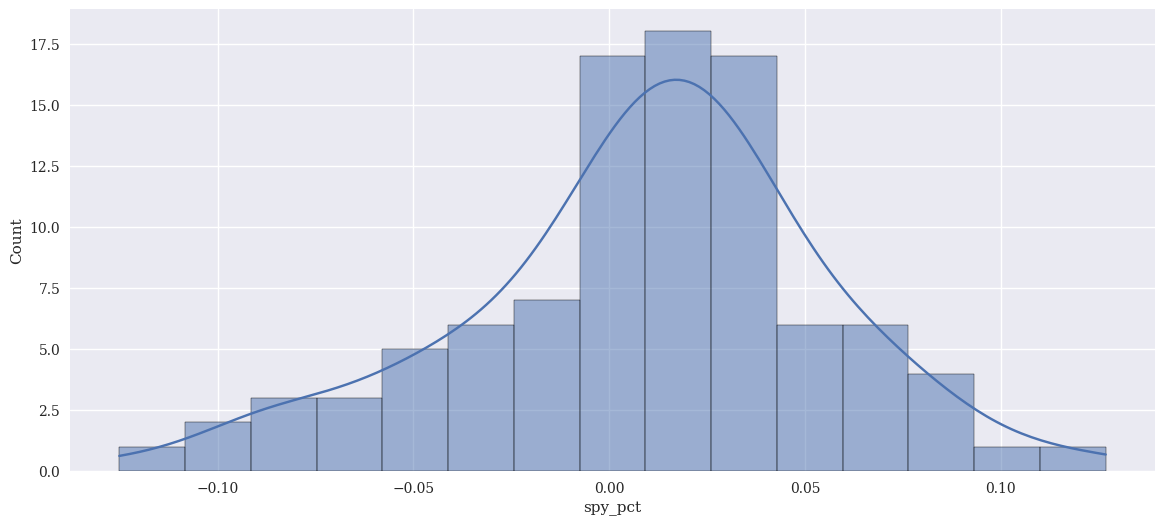

In [ ]:
sns.histplot(final_df['spy_pct'],kde=True, bins=15)

<Axes: xlabel='btc_pct', ylabel='Count'>

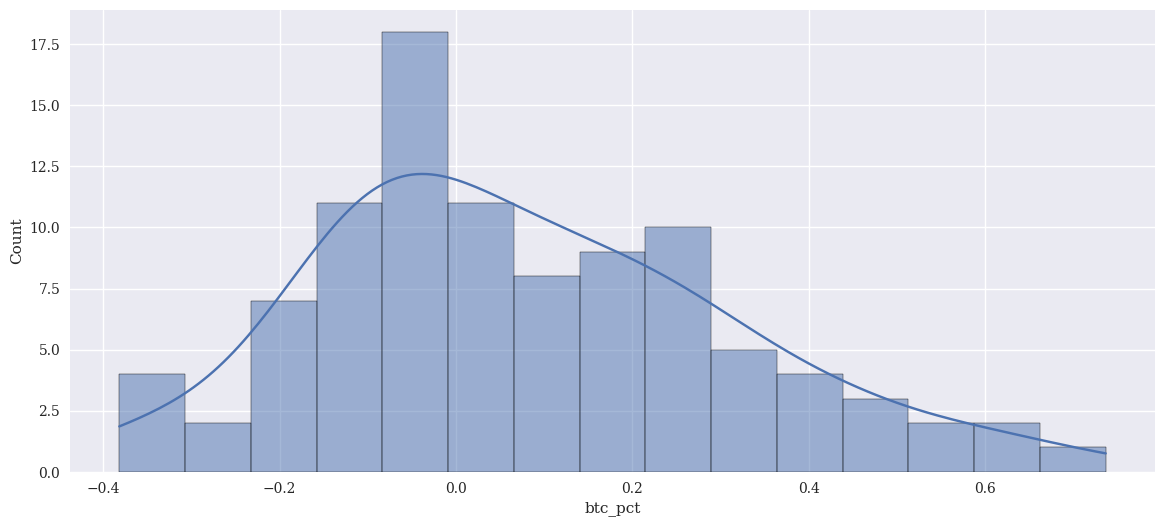

In [ ]:
sns.histplot(final_df['btc_pct'],kde=True, bins=15)

<Axes: xlabel='gld_pct', ylabel='Count'>

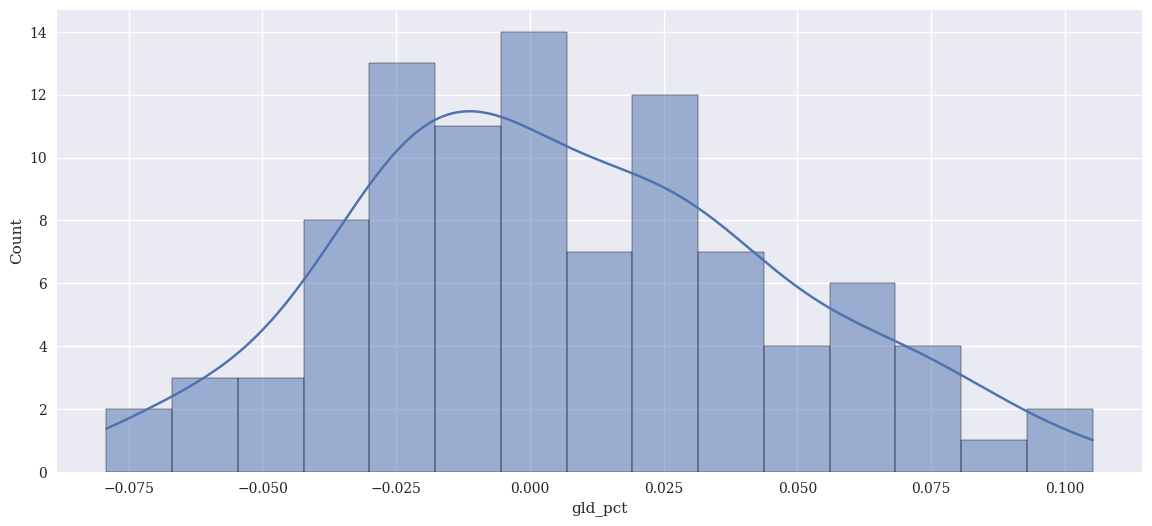

In [ ]:
sns.histplot(final_df['gld_pct'],kde=True, bins=15)

##### 1. Why did you pick the specific chart?
Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?
Above plots shows that the range of monthly returns is much larger for Bitcoin than for US equities. The returns distribution of BTC is negatively skewed with fat tails same for Gold whereas equities exhibit a classic normal distribution with a slightly positive skeweness.

##### 3. Will the gained insights help creating a positive business impact?
Bitcoin's wider range of monthly returns and negatively skewed distribution with fat tails highlight its high volatility and potential for extreme gains or losses. This information is valuable for businesses in finance, investment, or cryptocurrency sectors, as it emphasizes the need for robust risk management strategies when dealing with Bitcoin. Firms can develop tailored investment products, such as hedged funds or volatility-based trading tools, to cater to risk-tolerant investors. Additionally, the data can guide educational initiatives, helping clients understand Bitcoin's unique risk-return profile and make informed decisions. For businesses in the crypto space, this insight reinforces the importance of offering secure and flexible trading platforms to manage volatility. Overall, understanding Bitcoin's return distribution enables businesses to innovate, mitigate risks, and capitalize on its growth potential while meeting customer needs.

In [ ]:
#Calculating Standard Deviation and Sharpe Ratio

spy_ann_sdv = final_df['spy_pct'].std()*(12**0.5)
btc_ann_sdv = final_df['btc_pct'].std()*(12**0.5)
gld_ann_sdv = final_df['gld_pct'].std()*(12**0.5)

spy_sharpe = spy_return_ann/spy_ann_sdv
btc_sharpe = btc_return_ann/btc_ann_sdv
gld_sharpe = gld_return_ann/gld_ann_sdv

#Max Drawdown
spy_maxDD = min(final_df['Adj Close_spy']/final_df['Adj Close_spy'].expanding().max()-1)
btc_maxDD = min(final_df['Adj Close_btc']/final_df['Adj Close_btc'].expanding().max()-1)
gld_maxDD = min(final_df['Adj Close_gld']/final_df['Adj Close_gld'].expanding().max()-1)

spy_maxDD_daily = min(merged_df1['Adj Close_x']/merged_df1['Adj Close_x'].expanding().max()-1)
btc_maxDD_daily = min(merged_df1['Adj Close_y']/merged_df1['Adj Close_y'].expanding().max()-1)
gld_maxDD_daily = min(merged_df1['Adj Close']/merged_df1['Adj Close'].expanding().max()-1)

#Historical VAR(95%) and CVAR(5%)
spy_Var = final_df['spy_pct'].nsmallest(5)[4]
btc_Var = final_df['btc_pct'].nsmallest(5)[4]
gld_Var = final_df['gld_pct'].nsmallest(5)[4]

spy_CVar = final_df['spy_pct'].nsmallest(5).mean()
btc_CVar = final_df['btc_pct'].nsmallest(5).mean()
gld_CVar = final_df['gld_pct'].nsmallest(5).mean()

#Summary Table
table = {'Annual Return (in %)': [round(spy_return_ann*100,2),round(btc_return_ann*100,2),round(gld_return_ann*100,2)],
        'Annual Volitility (in %)':[round(spy_ann_sdv*100,2),round(btc_ann_sdv*100,2),round(gld_ann_sdv*100,2)],
        'Sharpe Ratio':[round(spy_sharpe,2),round(btc_sharpe,2),round(gld_sharpe,2)],
        'Maximum Drawdown(monthly, in %)':[round(spy_maxDD*100,2),round(btc_maxDD*100,2),round(gld_maxDD*100,2)],
        'Maximum Drawdown(daily, in %)':[round(spy_maxDD_daily*100,2),round(btc_maxDD_daily*100,2),round(gld_maxDD_daily*100,2)],
        'Var(95)(in %)':[round(spy_Var*100,2),round(btc_Var*100,2),round(gld_Var*100,2)],
        'CVar(5)(in %)':[round(spy_CVar*100,2),round(btc_CVar*100,2),round(gld_CVar*100,2)]}
summary_df = pd.DataFrame(table).transpose()
summary_df.columns = ['S&P 500', 'Bitcoin','Gold']

print('\033[1m' +  'Asset class summary statistics (2014-2022)')
display(summary_df)

Asset class summary statistics (2014-2022)


,S&P 500,Bitcoin,Gold
Annual Return (in %),10.04,84.22,7.31
Annual Volitility (in %),15.92,81.55,13.67
Sharpe Ratio,0.63,1.03,0.53
"Maximum Drawdown(monthly, in %)",-24.77,-76.41,-16.86
"Maximum Drawdown(daily, in %)",-33.92,-83.04,-20.87
Var(95)(in %),-8.41,-30.26,-5.77
CVar(5)(in %),-9.65,-34.74,-6.74


Above Summary table confirms that the significantly higher average return of Bitcoin has come at the expense of significantly higher risks. Annualized volatility (based on monthly data) is a whopping 81.6% compared to 15.6% for US equities. The maximum drawdown realized over the period was -83% compared to -34% for the S&P 500 (based on daily data). Still, on risk-adjusted returns, as measured by the Sharpe ratio, Bitcoin's .8 compares favorably to both US stocks (0.6) and gold (0.2). Note that we are using a risk-free rate of zero throughout this report. 

Acknowledging the shortcomings of volatility as a risk measure (e.g. it captures upside volatility as well, which might actually be desirable), we add the historic Value-at-Risk (VaR) for the 95% confidence interval: Bitcoin's VaR of -30.3% has been more than 4-times that of US equities. Finally, "expected shortfall" measures the mean loss below the VaR and gives another indication of Bitcoin's significant tail risk: -34.7% for Bitcoin vs. -8.4% for US equities. VaR and Conditional VaR have their own drawbacks, such as the implicit assumption of normal distribution and should be used carefully too. But in short, Bitcoin comes with significantly higher risk across all measures we looked at.

#### Chart - 5 : Intraday trading ranges

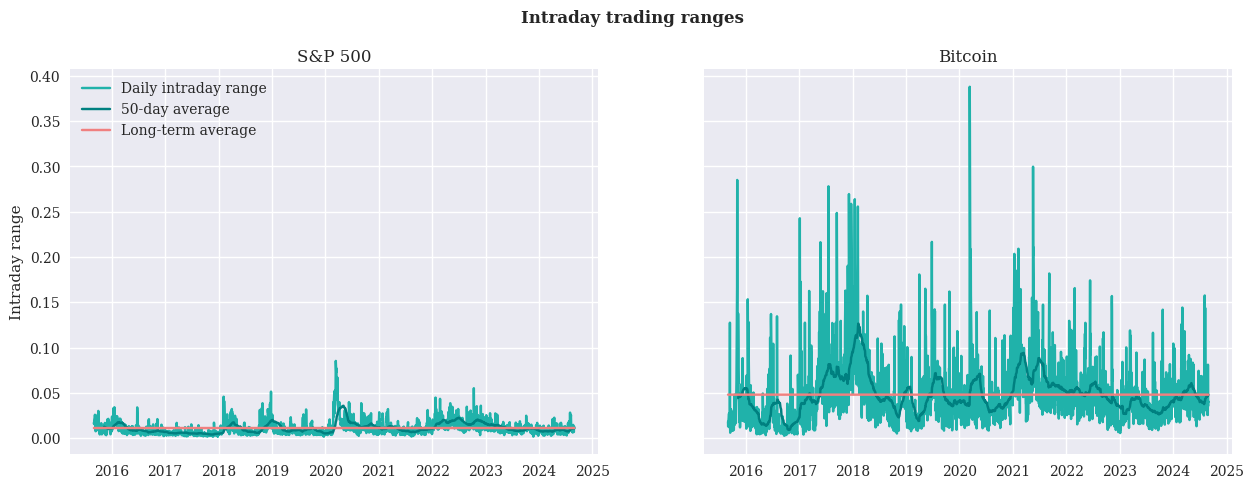

In [ ]:
#Add daily intraday trading ranges and plot (SP 500 & BTC only)

merged_df1['spy_range'] = (merged_df1['High_x'] - merged_df1['Low_x'])/merged_df1['Open_x']
merged_df1['btc_range'] = (merged_df1['High_y'] - merged_df1['Low_y'])/merged_df1['Open_y']

merged_df1['spy_range_mean'] = merged_df1['spy_range'].mean()
merged_df1['btc_range_mean'] = merged_df1['btc_range'].mean()

fig, ax = plt.subplots(1,2,figsize=(15,5),sharey=True)
plt.suptitle('Intraday trading ranges',fontweight='bold',y=1.0)

ax[0].plot(merged_df1.index, merged_df1['spy_range'], color='lightseagreen', label='Daily intraday range')
ax[0].plot(merged_df1.index, merged_df1['spy_range'].rolling(50).mean(), color='teal', label='50-day average')
ax[0].plot(merged_df1.index, merged_df1['spy_range_mean'] , color='lightcoral', label='Long-term average')
ax[0].set_title('S&P 500')
ax[0].set_ylabel('Intraday range')
ax[0].legend(loc='upper left')

ax[1].plot(merged_df1.index, merged_df1['btc_range'] , color='lightseagreen')
ax[1].plot(merged_df1.index, merged_df1['btc_range'] .rolling(50).mean(), color='teal')
ax[1].plot(merged_df1.index, merged_df1['btc_range_mean'], color='lightcoral')
ax[1].set_title('Bitcoin')

plt.show()

##### 1. Why did you pick the specific chart?
A line plot, also known as a line chart or line graph, is a way to visualize the trend of a single variable over time. It uses a series of data points connected by a line to show how the value of the variable changes over time.

Line plots are useful because they can quickly and easily show trends and patterns in the data. They are particularly useful for showing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

To see how the different prices are released over the years I have used line plot here.

##### 2. What is/are the insight(s) found from the chart?
Another way to highlight Bitcoin's risk is to look at its intraday trading range compared to US equities. The long-term average is 4.9% for Bitcoin vs. 1% for the S&P 500. More interesting are the spikes, which have reached 30-40% for Bitcoin on extreme days - a far cry from what has been observed for equities. Such large intraday swings can potentially cause problems for portfolio (risk) management.

##### 3. Will the gained insights help creating a positive business impact?
Bitcoin's high intraday volatility, with swings up to 30-40%, highlights the need for advanced risk management tools and strategies. Businesses can develop tailored solutions, such as dynamic hedging products, real-time monitoring systems, or educational resources, to help investors navigate Bitcoin's volatility. This can attract risk-tolerant clients, enhance portfolio management services, and position firms as leaders in the cryptocurrency space. By addressing Bitcoin's unique risks, businesses can build trust, drive innovation, and capitalize on growing interest in digital assets.

## ***4. Bitcoin and Inflation Analysis:***

Let's explore how these asset classes are correlated to one another and to inflation and whether Bitcoin has been a good hedge against inflation.

In [ ]:
#Calculate correlation matrix on monthly changes
final_df['cpi_pct'] = cpi_df.CPIAUCSL.pct_change()
corr_df = final_df[['spy_pct','btc_pct','gld_pct','cpi_pct']]
corr_df.rename(columns={'spy_pct':'S&P 500','btc_pct':'Bitcoin','gld_pct':'Gold','cpi_pct':'CPI US'},inplace=True)
corr_mat = corr_df.corr().round(2)

#### Chart - 6 : Scatterplots with linear regression lines of Bitcoin and Inflation

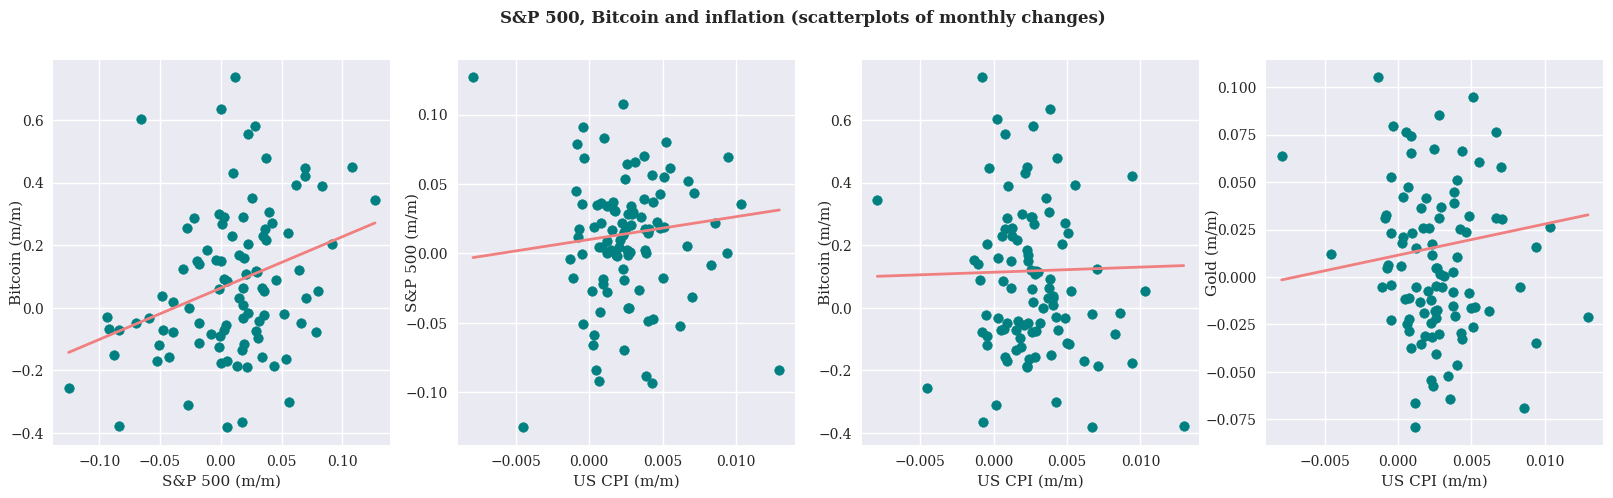


 Correlation coefficients


,S&P 500,Bitcoin,Gold,CPI US
S&P 500,1.00,0.32,0.13,-0.02
Bitcoin,0.32,1.00,0.16,-0.17
Gold,0.13,0.16,1.00,-0.13
CPI US,-0.02,-0.17,-0.13,1.00


In [ ]:
#Scatterplots with linear regression lines
sp = corr_df['S&P 500']
btc = corr_df['Bitcoin']
gld = corr_df['Gold']
cpi = corr_df['CPI US']

res1 = stats.linregress(sp, btc)
res2 = stats.linregress(cpi, sp)
res3 = stats.linregress(cpi, btc)
res4 = stats.linregress(cpi,gld)

fig, ax = plt.subplots(1,4, figsize=(20,5))
fig.suptitle('S&P 500, Bitcoin and inflation (scatterplots of monthly changes)',fontweight='bold')

ax[0].scatter(corr_df['S&P 500'], corr_df['Bitcoin'], color='teal')
ax[0].set_xlabel('S&P 500 (m/m)')
ax[0].set_ylabel('Bitcoin (m/m)',labelpad=-10)
ax[0].tick_params(bottom=False)

fx = np.array([sp.min(), sp.max()])
fy = res1.intercept + res1.slope * fx
ax[0].plot(fx,fy,color='lightcoral',lw=2)

ax[1].scatter(corr_df['CPI US'], corr_df['S&P 500'], color='teal')
ax[1].set_xlabel('US CPI (m/m)')
ax[1].set_ylabel('S&P 500 (m/m)',labelpad=-10)
ax[1].tick_params(bottom=False)

fx = np.array([cpi.min(), cpi.max()])
fy = res2.intercept + res1.slope * fx
ax[1].plot(fx,fy,color='lightcoral',lw=2)

ax[2].scatter(corr_df['CPI US'], corr_df['Bitcoin'], color='teal')
ax[2].set_xlabel('US CPI (m/m)')
ax[2].set_ylabel('Bitcoin (m/m)',labelpad=-10)
ax[2].tick_params(bottom=False)

fx = np.array([cpi.min(), cpi.max()])
fy = res3.intercept + res1.slope * fx
ax[2].plot(fx,fy,color='lightcoral',lw=2)

ax[3].scatter(corr_df['CPI US'], corr_df['Gold'], color='teal')
ax[3].set_xlabel('US CPI (m/m)')
ax[3].set_ylabel('Gold (m/m)',labelpad=-10)
ax[3].tick_params(bottom=False)

fx = np.array([cpi.min(), cpi.max()])
fy = res4.intercept + res1.slope * fx
ax[3].plot(fx,fy,color='lightcoral',lw=2)

plt.show()

print()
print('\033[1m' + ' Correlation coefficients')
display(corr_mat)

##### 1. Why did you pick the specific chart?
Scatterplot, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and relationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?
The scatterplot of monthly changes as well as the correlation coefficient of close to zero suggest that there has been no consistent relationship between changes in the price of Bitcoin and inflation since 2014. In itself Bitcoin does not offer good hedging properties against inflation, as it has been largely uncorrelated to changes in the general price level. It seems neither positively nor negatively affected by inflation. Gold also exhibits the same relationship as Bitcoin with regards to inflation.

It's also worth noting the positive correlation between the S&P 500 and Bitcoin. A correlation coefficient of 0.3 suggests that Bitcoin tends to move in the same direction as equities, thus offering only limited diversification benefits in a portfolio with equities.

##### 3. Will the gained insights help creating a positive business impact?
Understanding Bitcoin's lack of correlation with inflation and its limited diversification benefits relative to equities allows businesses to refine investment strategies and product offerings. Firms can develop targeted solutions, such as inflation-hedged portfolios or hybrid investment products combining Bitcoin and equities, to meet specific client needs. Additionally, these insights can guide risk management practices and client education, enhancing trust and credibility. By leveraging this data, businesses can innovate, optimize portfolios, and attract investors seeking tailored financial solutions.

#### Chart - 7 : Monthly Bitcoin returns by inflation percentiles

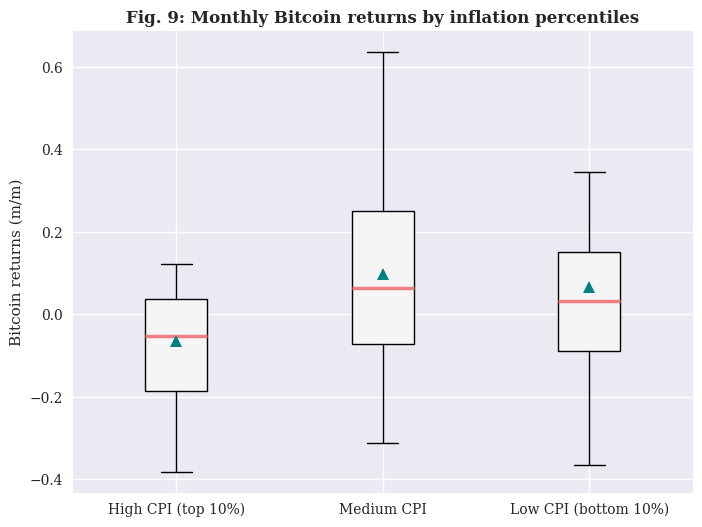

In [ ]:
#Find BTC returns in different inflation percentiles and show in boxplot
btc_90perc = corr_df['Bitcoin'][corr_df['CPI US'] >= np.percentile(corr_df['CPI US'],90)]
btc_between = corr_df['Bitcoin'][corr_df['CPI US'] < np.percentile(corr_df['CPI US'],90)][corr_df['CPI US'] > np.percentile(corr_df['CPI US'],10)]
btc_10perc = corr_df['Bitcoin'][corr_df['CPI US'] <= np.percentile(corr_df['CPI US'],10)]

perc_data =  [btc_90perc, btc_between, btc_10perc]

fig, ax = plt.subplots(figsize=(8,6))
plt.title('Fig. 9: Monthly Bitcoin returns by inflation percentiles',fontweight='bold')

ax.boxplot(perc_data,labels=['High CPI (top 10%)','Medium CPI','Low CPI (bottom 10%)'],showfliers=False,showmeans=True,patch_artist=True,
           boxprops=dict(facecolor='whitesmoke'),medianprops=dict(color='lightcoral',linewidth=2.5),meanprops=dict(markerfacecolor='teal',markeredgecolor='teal',markersize=8))

ax.set_ylabel('Bitcoin returns (m/m)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(left=False)

plt.show()

##### 1. Why did you pick the specific chart?
Box plots are used to visually represent the distribution of data, highlighting key aspects like the median, quartiles, and outliers, making it particularly useful for comparing the spread and central tendency of multiple data sets at a glance, especially when looking for significant differences between groups or identifying unusual data points (outliers). 

##### 2. What is/are the insight(s) found from the chart?
We split the monthly inflation data into its 90th percentile (top 10%), 10th percentile (bottom 10%) and all observations in between (medium) and analyze the behavior of Bitcoin in each of these "buckets" in a boxplot. This plot makes the relatioship more clearer as during high inflation the returns are towards negative territory compared to other 2 periods of inflation. This infacts points that bitcoin mostly produces negative returns during high inflation period as the mean (triangle) and median (line) both are negative.

##### 3. Will the gained insights help creating a positive business impact?
Recognizing that Bitcoin tends to produce negative returns during high inflation periods allows businesses to develop tailored risk management strategies and investment products. For instance, firms can create inflation-hedged portfolios or diversify assets to mitigate Bitcoin's underperformance during high inflation. This insight also enhances client advisory services, enabling businesses to provide data-driven recommendations and build trust. By addressing Bitcoin's limitations during inflationary periods, businesses can optimize portfolios, attract cautious investors, and strengthen their market position.

## ***5. Porfolio Allocation and Analysis:***

In [ ]:
corr_sp500_btc = corr_mat.iloc[0,2]
corr_sp500_gold = corr_mat.iloc[0,1]
corr_btc_gold = corr_mat.iloc[1,2]

vol_list = []
ret_list = []
vol_table = pd.DataFrame()

for i in range(0,120,20):
    for j in range(0,120,20):
        if i+j<=100:
            w_spy = i/100
            w_btc = j/100
            w_gld = 1-w_spy-w_btc
            
            port_vol = ((w_spy**2)*(spy_ann_sdv**2)+(w_btc**2)*(btc_ann_sdv**2)+(w_gld**2)*(gld_ann_sdv**2)
                       +(2*corr_sp500_btc*w_spy*w_btc*spy_ann_sdv*btc_ann_sdv)
                        +(2*corr_sp500_gold*w_spy*w_gld*spy_ann_sdv*gld_ann_sdv)
                       +(2*corr_btc_gold*w_btc*w_gld*btc_ann_sdv*gld_ann_sdv)) ** (1/2)
            
            port_ret = w_spy*spy_return_ann + w_btc*btc_return_ann + w_gld*gld_return_ann
            
            vol_list.append(port_vol*100)
            ret_list.append(port_ret*100)
            
        else:
            vol_list.append(np.nan)
            ret_list.append(np.nan)
            
            
vol_table['0% Equities'] = vol_list[0:6]
vol_table['20% Equities'] = vol_list[6:12]
vol_table['40% Equities'] = vol_list[12:18]
vol_table['60% Equities'] = vol_list[18:24]
vol_table['80% Equities'] = vol_list[24:30]
vol_table['100% Equities'] = vol_list[30:36]

vol_table.set_index(pd.Index(['0% Bitcoin','20% Bitcoin','40% Bitcoin','60% Bitcoin','80% Bitcoin','100% Bitcoin']), inplace=True)

print('\033[1m' + 'Portfolio volatility for different allocations (in % p.a.)')
display(vol_table.style.highlight_min(axis=None, color='cyan'))
        

Portfolio volatility for different allocations (in % p.a.)


,0% Equities,20% Equities,40% Equities,60% Equities,80% Equities,100% Equities
0% Bitcoin,13.674256,12.332651,11.886450,12.432439,13.853800,15.917741
20% Bitcoin,21.042632,20.408685,20.354873,20.885683,21.958758,nan
40% Bitcoin,34.886414,34.632311,34.724868,35.161348,nan,nan
60% Bitcoin,50.097843,50.007419,50.157497,nan,nan,nan
80% Bitcoin,65.734224,65.730886,nan,nan,nan,nan
100% Bitcoin,81.551487,nan,nan,nan,nan,nan


To get an initial idea of how these three asset classes interact in a portfolio, above shows the historical portfolio volatility for different pre-defined combinations of US equities, Bitcoin and gold (the allocation to gold is the residual to make portfolio weights add up to 100%). E.g. a portfolio of 60% US equities, 20% Bitcoin and 20% gold had a volatility of 20.03%. This table already suggests that any allocation to Bitcoin increases portfolio volatility meaningfully. Among these pre-defined portfolios a combination of 40% equities and 60% gold had the lowest volatility (11.7%). Note that this is lower than the volatility of either a pure equity or pure gold portfolio (15.6% respectively 13.3%).

In [ ]:
#Add returns to above table to also compare Sharpe ratios
ret_table = pd.DataFrame()

ret_table['0% Equities'] = ret_list[0:6]
ret_table['20% Equities'] = ret_list[6:12]
ret_table['40% Equities'] = ret_list[12:18]
ret_table['60% Equities'] = ret_list[18:24]
ret_table['80% Equities'] = ret_list[24:30]
ret_table['100% Equities'] = ret_list[30:36]

ret_table.set_index(pd.Index(['0% Bitcoin','20% Bitcoin','40% Bitcoin','60% Bitcoin','80% Bitcoin','100% Bitcoin']), inplace=True)

Sharpe_table = ret_table / vol_table

print('\033[1m' + 'Portfolio Sharpe ratio for different allocations')
display(Sharpe_table.style.highlight_max(axis=None, color='orange'))

Portfolio Sharpe ratio for different allocations


,0% Equities,20% Equities,40% Equities,60% Equities,80% Equities,100% Equities
0% Bitcoin,0.534817,0.637202,0.706986,0.719789,0.685292,0.630684
20% Bitcoin,1.078498,1.138712,1.168505,1.164910,1.132811,nan
40% Bitcoin,1.091418,1.115167,1.127895,1.129398,nan,nan
60% Bitcoin,1.067049,1.079881,1.087519,nan,nan,nan
80% Bitcoin,1.047218,1.055566,nan,nan,nan,nan
100% Bitcoin,1.032713,nan,nan,nan,nan,nan


Above table shows the Sharpe ratio (assuming a risk-free rate of zero) for different portfolio allocations. Unlike the minimum volatility portfolio, to optimize the portfolio's risk-adjusted returns in the past would have involved a certain allocation to Bitcoin. The highest risk-adjusted return among these pre-defined allocations would have been achieved with a 80% equity, 20% Bitcoin and 0% gold portfolio (Sharpe ratio of 0.92). We'll next use random sampling to approximate the efficient frontier and both portfolios more precisely.

#### Chart - 8 : Efficient Frontier

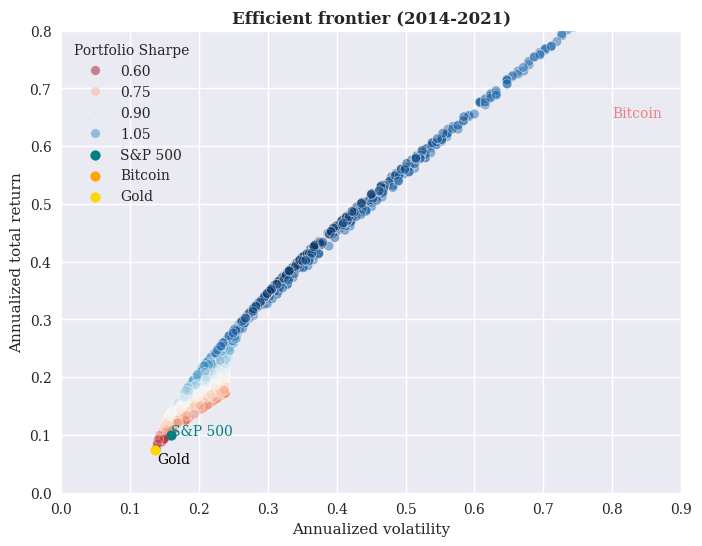

In [ ]:
# Run 1000 random portfolio samples to build risk-return scatter (estimated efficient frontier)
risk_ret = {}
risk_w = {}

np.random.seed(1)

for i in np.random.uniform(0, .99, 1000):
    w_spy = round(i, 4)
    w_btc = np.random.randint(100 - w_spy * 100) / 100
    w_gld = 1 - w_spy * w_btc
    
    port_vol = ((w_spy**2) * (spy_ann_sdv**2) + (w_btc**2) * (btc_ann_sdv**2) + (w_gld**2) * (gld_ann_sdv**2)
               + (2 * corr_sp500_btc * w_spy * w_btc * spy_ann_sdv * btc_ann_sdv)
               + (2 * corr_sp500_gold * w_spy * w_gld * spy_ann_sdv * gld_ann_sdv)
               + (2 * corr_btc_gold * w_btc * w_gld * btc_ann_sdv * gld_ann_sdv)) ** (1/2)
    
    port_ret = w_spy * spy_return_ann + w_btc * btc_return_ann + w_gld * gld_return_ann
    
    risk_ret[port_vol] = port_ret
    risk_w[port_vol] = w_spy, w_btc, w_gld
    
risk_return_df = pd.DataFrame(list(risk_ret.items()), columns=['Ptf volatility', 'Ptf return']) 
risk_weights_df = pd.DataFrame(list(risk_w.items()), columns=['Ptf volatility', 'Asset class weights']) 
risk_return_df['Ptf Sharpe'] = risk_return_df['Ptf return'] / risk_return_df['Ptf volatility']
portfolio_df = risk_return_df.merge(risk_weights_df, on='Ptf volatility') 

# Plot the efficient frontier
fig, ax = plt.subplots(figsize=(8, 6))
plt.title('Efficient frontier (2014-2021)', fontweight='bold')

# Use keyword arguments for sns.scatterplot
sns.scatterplot(x=portfolio_df['Ptf volatility'], y=portfolio_df['Ptf return'], 
                hue=portfolio_df['Ptf Sharpe'], palette='RdBu', alpha=0.5)

# Add individual asset points
ax.scatter(spy_ann_sdv, spy_return_ann, color='teal', label='S&P 500')
ax.scatter(btc_ann_sdv, btc_return_ann, color='orange', label='Bitcoin')
ax.scatter(gld_ann_sdv, gld_return_ann, color='gold', label='Gold')

# Set labels and limits
ax.set_xlabel('Annualized volatility')
ax.set_ylabel('Annualized total return')
ax.set_ylim([0, 0.8])
ax.set_xlim([0, 0.9])

# Customize the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper left', title='Portfolio Sharpe')

# Add annotations
ax.annotate('S&P 500', (0.16, 0.10), color='teal')
ax.annotate('Bitcoin', (0.80, 0.65), color='lightcoral')
ax.annotate('Gold', (0.14, 0.05), color='black')

plt.show() 

In [ ]:
#Approximate the min vola and max Sharpe ratio portfolios (from the 1000 random samples above)
min_vol = portfolio_df['Ptf volatility'].min()
min_vol_ret = portfolio_df['Ptf return'][portfolio_df['Ptf volatility'] == min_vol]
min_vol_SR = portfolio_df['Ptf Sharpe'][portfolio_df['Ptf volatility'] == min_vol]
min_vol_w = portfolio_df['Asset class weights'][portfolio_df['Ptf volatility'] == min_vol]

max_SR = portfolio_df['Ptf Sharpe'].max()
max_SR_vol = portfolio_df['Ptf volatility'][portfolio_df['Ptf Sharpe'] == max_SR]
max_SR_ret = portfolio_df['Ptf return'][portfolio_df['Ptf Sharpe'] == max_SR]
max_SR_w = portfolio_df['Asset class weights'][portfolio_df['Ptf Sharpe'] == max_SR]

#Summary table
Opt_ptfs1 = {'Equity weight (in %)': [round(min_vol_w.reset_index()['Asset class weights'][0][0]*100,0), round(max_SR_w.reset_index()['Asset class weights'][0][0]*100,0)], 
            'Gold weight (in %)': [round(min_vol_w.reset_index()['Asset class weights'][0][1]*100,0), round(max_SR_w.reset_index()['Asset class weights'][0][1]*100,0)],
            'Bitcoin weight (in %)': [round(min_vol_w.reset_index()['Asset class weights'][0][2]*100,0), round(max_SR_w.reset_index()['Asset class weights'][0][2]*100,0)],
            'Annual ptf return (in %)': [round(min_vol_ret.iloc[0]*100,2), round(max_SR_ret.iloc[0]*100,2)],
            'Annual ptf volatility (in %)': [round(min_vol*100,2), round(max_SR_vol.iloc[0]*100,2)], 
            'Ptf Sharpe ratio': [round(min_vol_SR.iloc[0],2), round(max_SR,2)] }

Opt_ptfs1_df = pd.DataFrame(Opt_ptfs1).transpose()
Opt_ptfs1_df.columns = ['Min volatility ptf (random sampling)', 'Max Sharpe ptf (random sampling)']

print('\033[1m' + 'Minimum volatility and maximum Sharpe ratio portfolios (approximated by random sampling)')
display(Opt_ptfs1_df)

Minimum volatility and maximum Sharpe ratio portfolios (approximated by random sampling)


,Min volatility ptf (random sampling),Max Sharpe ptf (random sampling)
Equity weight (in %),3.00,64.00
Gold weight (in %),0.00,34.00
Bitcoin weight (in %),100.00,78.00
Annual ptf return (in %),7.57,40.76
Annual ptf volatility (in %),13.81,34.99
Ptf Sharpe ratio,0.55,1.17


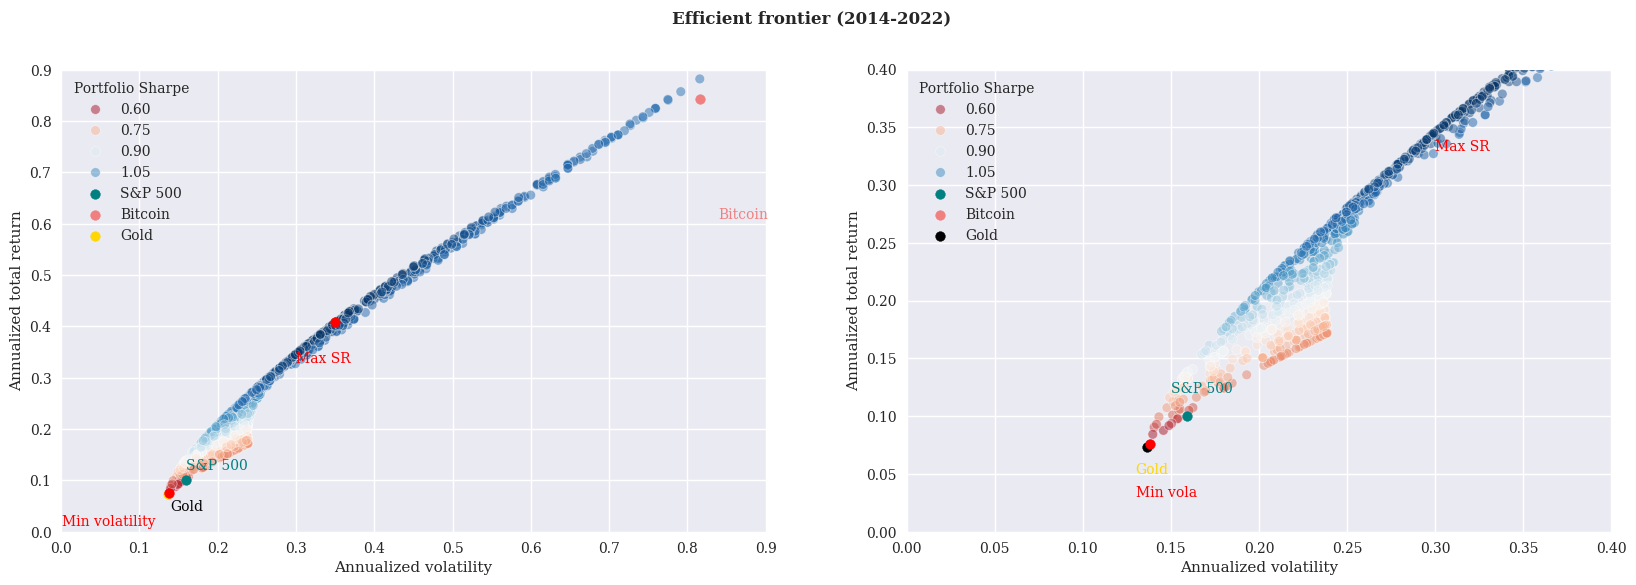

In [ ]:
# Add min vola and max Sharpe portfolios to efficient frontier chart (and "zoom in")
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
plt.suptitle('Efficient frontier (2014-2022)', fontweight='bold')

# First subplot
sns.scatterplot(x=portfolio_df['Ptf volatility'], y=portfolio_df['Ptf return'], ax=ax[0], 
                hue=portfolio_df['Ptf Sharpe'], palette='RdBu', alpha=0.5)
ax[0].scatter(spy_ann_sdv, spy_return_ann, color='teal', label='S&P 500')
ax[0].scatter(btc_ann_sdv, btc_return_ann, color='lightcoral', label='Bitcoin')
ax[0].scatter(gld_ann_sdv, gld_return_ann, color='gold', label='Gold')
ax[0].set_xlabel('Annualized volatility')
ax[0].set_ylabel('Annualized total return')
ax[0].set_ylim([0, 0.9])
ax[0].set_xlim([0, 0.9])
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].legend(loc='upper left', title='Portfolio Sharpe')
ax[0].annotate('S&P 500', (0.16, 0.12), color='teal')
ax[0].annotate('Bitcoin', (0.84, 0.61), color='lightcoral')
ax[0].annotate('Gold', (0.14, 0.04), color='black')

# Highlight min volatility and max Sharpe ratio portfolios
ax[0].scatter(min_vol, min_vol_ret, color='red', label='Min Volatility')
ax[0].scatter(max_SR_vol, max_SR_ret, color='red', label='Max Sharpe Ratio')
ax[0].annotate('Min volatility', (0.001, 0.0111), color='red')
ax[0].annotate('Max SR', (0.3, 0.33), color='red')

# Second subplot (zoomed in)
sns.scatterplot(x=portfolio_df['Ptf volatility'], y=portfolio_df['Ptf return'], ax=ax[1], 
                hue=portfolio_df['Ptf Sharpe'], palette='RdBu', alpha=0.5)
ax[1].scatter(spy_ann_sdv, spy_return_ann, color='teal', label='S&P 500')
ax[1].scatter(btc_ann_sdv, btc_return_ann, color='lightcoral', label='Bitcoin')
ax[1].scatter(gld_ann_sdv, gld_return_ann, color='black', label='Gold')
ax[1].set_xlabel('Annualized volatility')
ax[1].set_ylabel('Annualized total return')
ax[1].set_ylim([0, 0.4])
ax[1].set_xlim([0, 0.4])
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].legend(loc='upper left', title='Portfolio Sharpe')
ax[1].annotate('S&P 500', (0.15, 0.12), color='teal')
ax[1].annotate('Gold', (0.13, 0.05), color='gold')

# Highlight min volatility and max Sharpe ratio portfolios
ax[1].scatter(min_vol, min_vol_ret, color='red', label='Min Volatility')
ax[1].scatter(max_SR_vol, max_SR_ret, color='red', label='Max Sharpe Ratio')
ax[1].annotate('Min vola', (0.13, 0.03), color='red')
ax[1].annotate('Max SR', (0.3, 0.33), color='red')

plt.show()

## ***6. Portfolio Optimization:***

In [ ]:
#Min vola optimization

cov = corr_df.drop('CPI US',axis=1).cov()*12
exp_returns = [spy_return_ann, btc_return_ann, gld_return_ann]

ef = EfficientFrontier(exp_returns, cov, solver=cp.CVXOPT)

ef.min_volatility()
min_vol_w = ef.clean_weights()
min_vol_ptf = ef.portfolio_performance(risk_free_rate=0)

In [ ]:
#Max Sharpe optimization
ef = EfficientFrontier(exp_returns, cov)

ef.max_sharpe(risk_free_rate=0)
max_SR_w = ef.clean_weights()
max_SR_ptf = ef.portfolio_performance(risk_free_rate=0)

In [ ]:
#Min vola optimization with a min. BTC weight of 5%
ef = EfficientFrontier(exp_returns, cov, weight_bounds=(0.05,1))

ef.min_volatility()
min_volBTC_w = ef.clean_weights()
min_volBTC_ptf = ef.portfolio_performance(risk_free_rate=0)

In [ ]:
#Summary table
Opt_ptfs2 = {'Equity weight (in %)': [round(min_vol_w['S&P 500']*100,0), round(max_SR_w['S&P 500']*100,0), round(min_volBTC_w['S&P 500']*100,0)], 
            'Gold weight (in %)': [round(min_vol_w['Gold']*100,0), round(max_SR_w['Gold']*100,0), round(min_volBTC_w['Gold']*100,0)],
            'Bitcoin weight (in %)': [round(min_vol_w['Bitcoin']*100,0), round(max_SR_w['Bitcoin']*100,0), round(min_volBTC_w['Bitcoin']*100,0)],
            'Annual ptf return (in %)': [round(min_vol_ptf[0]*100,2), round(max_SR_ptf[0]*100,2), round(min_volBTC_ptf[0]*100,2)],
            'Annual ptf volatility (in %)': [round(min_vol_ptf[1]*100,2), round(max_SR_ptf[1]*100,2), round(min_volBTC_ptf[1]*100,2)], 
            'Ptf Sharpe ratio': [round(min_vol_ptf[2],2), round(max_SR_ptf[2],2), round(min_volBTC_ptf[2],2)] }

Opt_ptfs2_df = pd.DataFrame(Opt_ptfs2).transpose()
Opt_ptfs2_df.columns = ['Min volatility ptf (opt.)', 'Max Sharpe ptf (opt.)', 'Min Volatility with 2% BTC allocation (opt.)']

print('\033[1m' + ' Minimum volatility and maximum Sharpe ratio portfolios (optimized)')
display(Opt_ptfs2_df)

 Minimum volatility and maximum Sharpe ratio portfolios (optimized)


,Min volatility ptf (opt.),Max Sharpe ptf (opt.),Min Volatility with 2% BTC allocation (opt.)
Equity weight (in %),41.00,34.00,36.00
Gold weight (in %),59.00,47.00,59.00
Bitcoin weight (in %),0.00,19.00,5.00
Annual ptf return (in %),8.44,23.13,12.14
Annual ptf volatility (in %),11.03,20.38,12.34
Ptf Sharpe ratio,0.77,1.14,0.98


The optimal portfolio weights are relatively close to our earlier approximations. Still, optimization further improved the outcome, in particular for the minimum volatility portfolio, which unsurprisingly still contains no allocation to Bitcoin.
In order to acknowledge the superior (risk-adjusted) returns Bitcoin has generated so far, an interesting option could be to allocate a small fixed weight (of say 5%) to Bitcoin and minimize portfolio volatility with this additional constraint. The result is shown in the right column of the above table. The small Bitcoin allocation increases risk, return and Sharpe ratio compared to the strict minimum volatility portfolio. But the increase in volatility (from 10.4% to 10.7%) is relatively small. So, this small allocation to Bitcoin would have improved the fund's performance significantly, without changing its risk profile meaningfully. It would offer the additional advantage of gaining more hands-on experience with investing in Bitcoin, before potentially re-assessing again.

###  Illustration of optimal portfolios:

#### Chart - 9 : Total returns of optimised portfolios

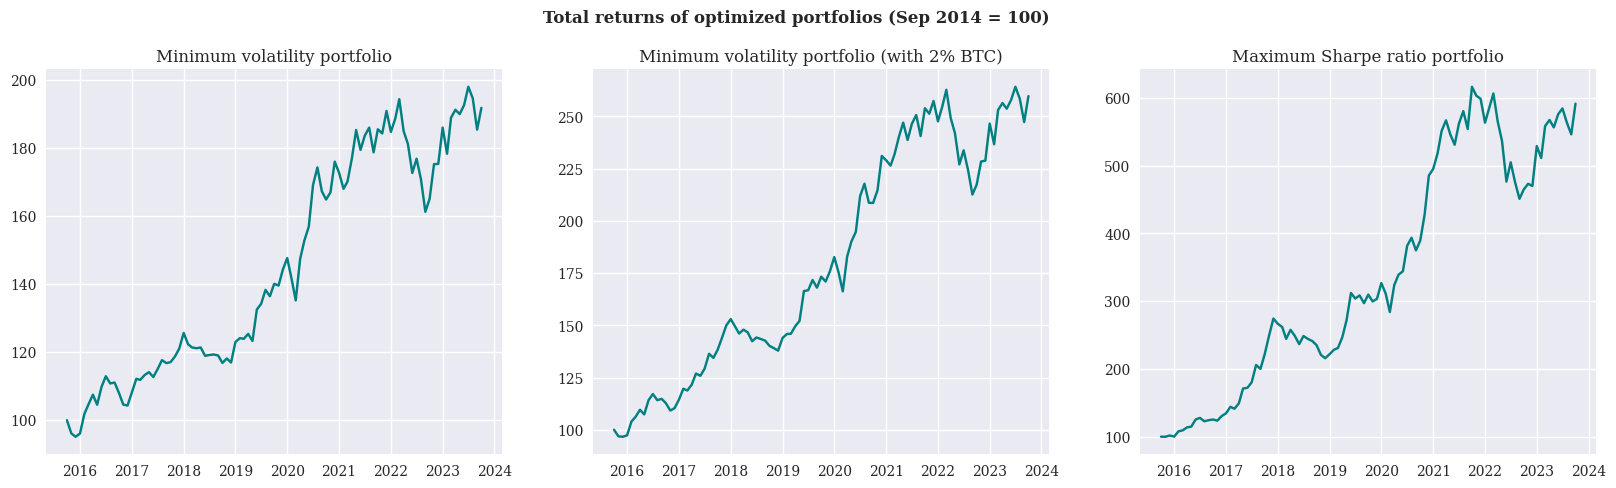

In [ ]:
#Illustrate the historic development for three "optimal" portfolios in a line chart
corr_df['Min volatility ptf'] = min_vol_w['S&P 500']*corr_df['S&P 500'] + min_vol_w['Gold']*corr_df['Gold'] + min_vol_w['Bitcoin']*corr_df['Bitcoin']
corr_df['Max Sharpe ptf'] = max_SR_w['S&P 500']*corr_df['S&P 500'] + max_SR_w['Gold']*corr_df['Gold'] + max_SR_w['Bitcoin']*corr_df['Bitcoin']
corr_df['Min vola w. BTC ptf'] = min_volBTC_w['S&P 500']*corr_df['S&P 500'] + min_volBTC_w['Gold']*corr_df['Gold'] + min_volBTC_w['Bitcoin']*corr_df['Bitcoin']

corr_df['Min vola ptf index'] = 100.0
corr_df['Max Sharpe ptf index'] = 100.0
corr_df['Min vola w. BTC ptf index'] = 100.0

for i in range(len(corr_df)-1):
    corr_df['Min vola ptf index'][i+1] = corr_df['Min vola ptf index'][i] * (1 + corr_df['Min volatility ptf'][i+1])
    corr_df['Max Sharpe ptf index'][i+1] = corr_df['Max Sharpe ptf index'][i] * (1 + corr_df['Max Sharpe ptf'][i+1])
    corr_df['Min vola w. BTC ptf index'][i+1] = corr_df['Min vola w. BTC ptf index'][i] * (1 + corr_df['Min vola w. BTC ptf'][i+1])

    
fig, ax = plt.subplots(1,3, figsize=(20,5))
plt.suptitle('Total returns of optimized portfolios (Sep 2014 = 100)',fontweight='bold',y=1.0)

ax[0].plot(corr_df.index, corr_df['Min vola ptf index'],color='teal')
ax[0].set_title('Minimum volatility portfolio')

ax[1].plot(corr_df.index, corr_df['Min vola w. BTC ptf index'],color='teal')
ax[1].set_title('Minimum volatility portfolio (with 2% BTC)')

ax[2].plot(corr_df.index, corr_df['Max Sharpe ptf index'],color='teal')
ax[2].set_title('Maximum Sharpe ratio portfolio')

plt.show() 

##### 1. Why did you pick the specific chart?
A line plot, also known as a line chart or line graph, is a way to visualize the trend of a single variable over time. It uses a series of data points connected by a line to show how the value of the variable changes over time.

Line plots are useful because they can quickly and easily show trends and patterns in the data. They are particularly useful for showing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

To see how the different prices are released over the years I have used line plot here.

##### 2. What is/are the insight(s) found from the chart?
The minimum volatility portfolio would have almost doubled in value since 2014 (+63%). Adding a fixed 5% allocation to Bitcoin would have increased performance to 120%. The value of the maximum Sharpe ratio portfolio would have more than quadrupled over the period (+440%).

##### 3. Will the gained insights help creating a positive business impact?
The chart demonstrates that adding Bitcoin to portfolios significantly enhances performance, as seen in the 5% Bitcoin allocation increasing returns to 120% and the maximum Sharpe ratio portfolio quadrupling in value. Businesses can leverage this data to design optimized investment products, such as Bitcoin-enhanced portfolios, attracting investors seeking higher returns. Additionally, these insights can guide marketing strategies, positioning firms as innovative and data-driven. By incorporating Bitcoin into portfolio offerings, businesses can improve client outcomes, drive growth, and gain a competitive edge in the market.

#### Chart - 10 : Monto Carlo Simulation

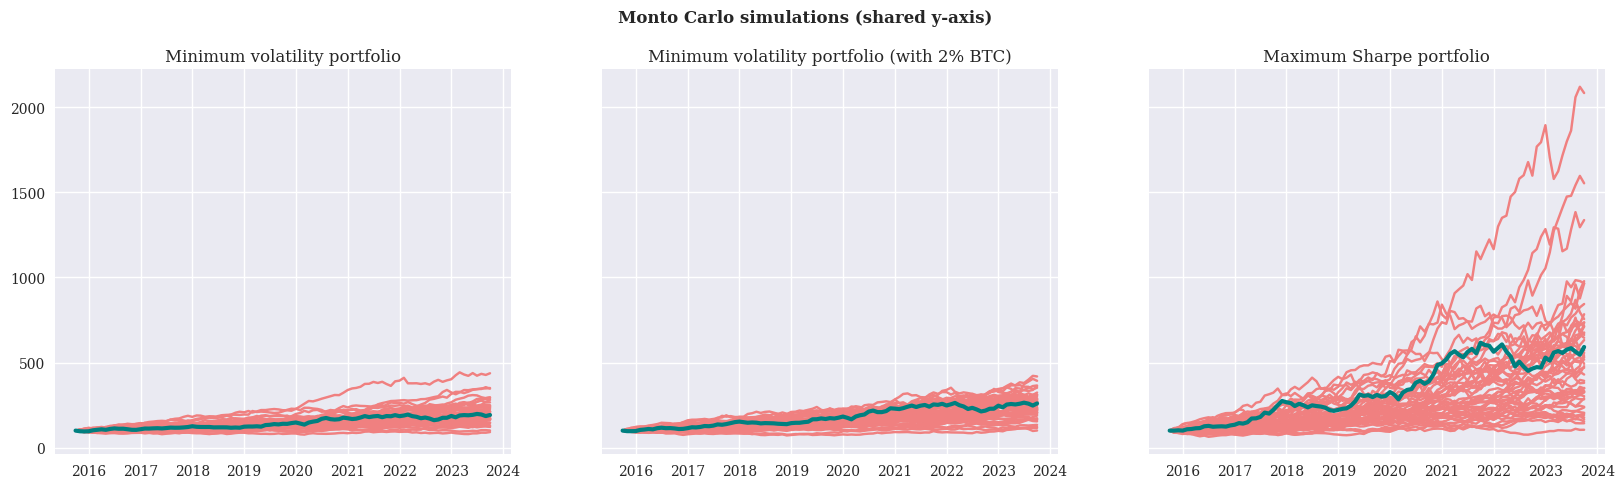

In [ ]:
#Add MC simulation based on normal distribution for both portfolios (just 50 runs each for illustration)
fig, ax = plt.subplots(1,3, figsize=(20,5), sharey=True)
plt.suptitle('Monto Carlo simulations (shared y-axis)',fontweight='bold',y=1.0)

ax[0].set_title('Minimum volatility portfolio')

ax[1].set_title('Minimum volatility portfolio (with 2% BTC)')

ax[2].set_title('Maximum Sharpe portfolio')


np.random.seed(1)

for i in range(50):

    s = np.random.normal((1+min_vol_ptf[0])**(1/12)-1, min_vol_ptf[1] / (12**0.5),97)

    corr_df['random'] = s
    corr_df['random index'] = 100.0

    for j in range(len(corr_df)-1):
        corr_df['random index'][j+1] = corr_df['random index'][j] * (1 + corr_df['random'][j+1])

    ax[0].plot(corr_df.index, corr_df['random index'],color='lightcoral')

    
for i in range(50):

    s = np.random.normal((1+min_volBTC_ptf[0])**(1/12)-1, min_volBTC_ptf[1] / (12**0.5),97)

    corr_df['random'] = s
    corr_df['random index'] = 100.0

    for j in range(len(corr_df)-1):
        corr_df['random index'][j+1] = corr_df['random index'][j] * (1 + corr_df['random'][j+1])

    ax[1].plot(corr_df.index, corr_df['random index'],color='lightcoral')  


for i in range(50):

    s = np.random.normal((1+max_SR_ptf[0])**(1/12)-1, max_SR_ptf[1] / (12**0.5),97)

    corr_df['random'] = s
    corr_df['random index'] = 100.0

    for j in range(len(corr_df)-1):
        corr_df['random index'][j+1] = corr_df['random index'][j] * (1 + corr_df['random'][j+1])

    ax[2].plot(corr_df.index, corr_df['random index'],color='lightcoral') 

    
ax[0].plot(corr_df.index, corr_df['Min vola ptf index'],color='teal',linewidth=3)
ax[1].plot(corr_df.index, corr_df['Min vola w. BTC ptf index'],color='teal',linewidth=3)
ax[2].plot(corr_df.index, corr_df['Max Sharpe ptf index'],color='teal',linewidth=3)

plt.show()

#### 1. Why did you pick the specific chart?
A line plot, also known as a line chart or line graph, is a way to visualize the trend of a single variable over time. It uses a series of data points connected by a line to show how the value of the variable changes over time.

Line plots are useful because they can quickly and easily show trends and patterns in the data. They are particularly useful for showing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

To see how the different prices are released over the years I have used line plot here.

##### 2. What is/are the insight(s) found from the chart?
To illustrate the uncertainty of outcomes, figure above adds a simple Monte Carlo simulation of returns around the historically realized portfolio returns (with 50 runs for each portfolio). This is assuming monthly returns to be normally distributed, which admittedly is a stretch based on our prior analysis. Still, it helps illustrate the impact that a meaningful inclusion of Bitcoin in a portfolio has on risk. The "cone" of possible outcomes for the maximum Sharpe ratio portfolio (with its 18% Bitcoin allocation) is pretty wide (ranging roughly from +100% to +1200% over the period).

Scenarios for the "middle ground" portfolio, minimizing volatility under a 5% Bitcoin allocation constraint, are reasonably close to the minimum volatility portfolio (ranging roughly from 0% to +200%), corroborating our view that the risk profile is not materially changed by this small Bitcoin allocation.

##### 3. Will the gained insights help creating a positive business impact?
The Monte Carlo simulation highlights that including Bitcoin in portfolios, even in small allocations (e.g., 5%), can enhance returns without significantly increasing risk. Businesses can use this data to design diversified, risk-adjusted portfolios that appeal to both conservative and growth-oriented investors. Offering Bitcoin-inclusive investment products can attract clients seeking higher returns while maintaining manageable risk levels. Additionally, these insights can strengthen client trust by demonstrating data-driven, optimized portfolio strategies. By leveraging Bitcoin's potential, businesses can innovate, improve client outcomes, and gain a competitive edge in the market.

# **7. Conclusion**

**Q1) How does the performance of Bitcoin (i.e. risk and returns) compare to the S&P 500 and gold?**

Bitcoin outperforms both S&P 500 and Gold by a significant margin. This outperformance came at the expense of significantly higher risk (across a range of measures like volatility, Value-at-Risk, drawdown or daily trading range). Still, risk adjusted returns of bitcoin (sharpe ratio .77) exceeded those of gold (.28) and equities (.56).

**Q2)  How does the inclusion of Bitcoin change a portfolio's characteristics and can it help improve a portfolio's performance?**

Bitcoin inclusion into our porfolio will increase both the risk and returns significantly. Bitcoin doesn't offers any diversification advantages as we found it to be positively correlated (correlation coeff. of 0.34) with equities thus only increasing returns at the expense of larger risk.

**Q3) Could Bitcoin be used as a hedge against inflation?**

No, there has been no consistent relationship between monthly changes in the general US consumer price level and the price of Bitcoin. During high inflation period bitcoin has performed at its lowest since becoming mainstream which can be seen in the box plot in earlier section. Though, one has to carefull as the low performance can't only attributed to rising interest rate for Bitcoin as there can be a case made that this low performance is due to malpractises in the crypto industry which has been highlighted in the news lately.



# **8. Recommendations:**

**In the light of our fund's goal to minimize risk: What is the minimum volatility portfolio, consisting of these three asset classes? And for comparison: Which portfolio would maximize risk-adjusted returns?**

Historically, the portfolio minimizing volatility consisted of 42% US equities, 58% gold and no Bitcoin. This portfolio achieved a volatility of 5.8% p.a. since 2014 and a Sharpe ratio of close to 0.56. The maximum Sharpe ratio of 1.46 would have been achieved with an allocation of 47% to US equities, 35% to gold and 18% to Bitcoin. This portfolio's volatility was 19.4% p.a.

Given the very high historic volatility of Bitcoin and its limited diversification value vs. equities, there is no place for Bitcoin, when the goal is to strictly minimize the fund's volatility. But to acknowledge the superior returns and high Sharpe ratio that Bitcoin has shown so far, we still recommend to consider a small fixed allocation of 5% to Bitcoin, alongside 35% in US stocks and 60% in gold. Since 2014 such an allocation would have increased volatility relatively little compared to the minimum volatility portfolio (from 10% to 11%), while significantly improving returns (from 5.8% to 9%) and the Sharpe ratio (from .56 to 0.72).  